<a href="https://colab.research.google.com/github/Blaze2020/Data_Analysis_Projects/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Yulu - Hypothesis Testing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 8.48MB/s]


In [ ]:
# Loading the Dataset
df=pd.read_csv('./bike_sharing.csv?1642089089')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**EDA Start**

In [ ]:
# Checking datatypes
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
# Describe the data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Info regarding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Data Cleanup**


In [ ]:
# Checking null data
df.isna().count()

,0
datetime,10886
season,10886
holiday,10886
workingday,10886
weather,10886
temp,10886
atemp,10886
humidity,10886
windspeed,10886
casual,10886


**Observations :**

Columns: datetime, season, holiday, workingday, weather, temp, atemp,
humidity, windspeed, casual, registered, count.

Target Variable: count (total number of bikes rented).

Features: Includes numerical (temp, humidity, etc.) and categorical (season, weather, etc.).

In [ ]:
# Converting dattime object to date
df['datetime']=pd.to_datetime(df['datetime'])
df['hour']=df['datetime'].dt.hour
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

# Converting to category
# Convert categorical columns to category dtype
categorical_columns = ['season', 'holiday', 'workingday', 'weather']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
 13  day         10886 non-null  int32         
 14  month       10886 non-null  int32         
 15  year        10886 non-null  int32         
dtypes: category(4), dateti

**Univariate Analysis**

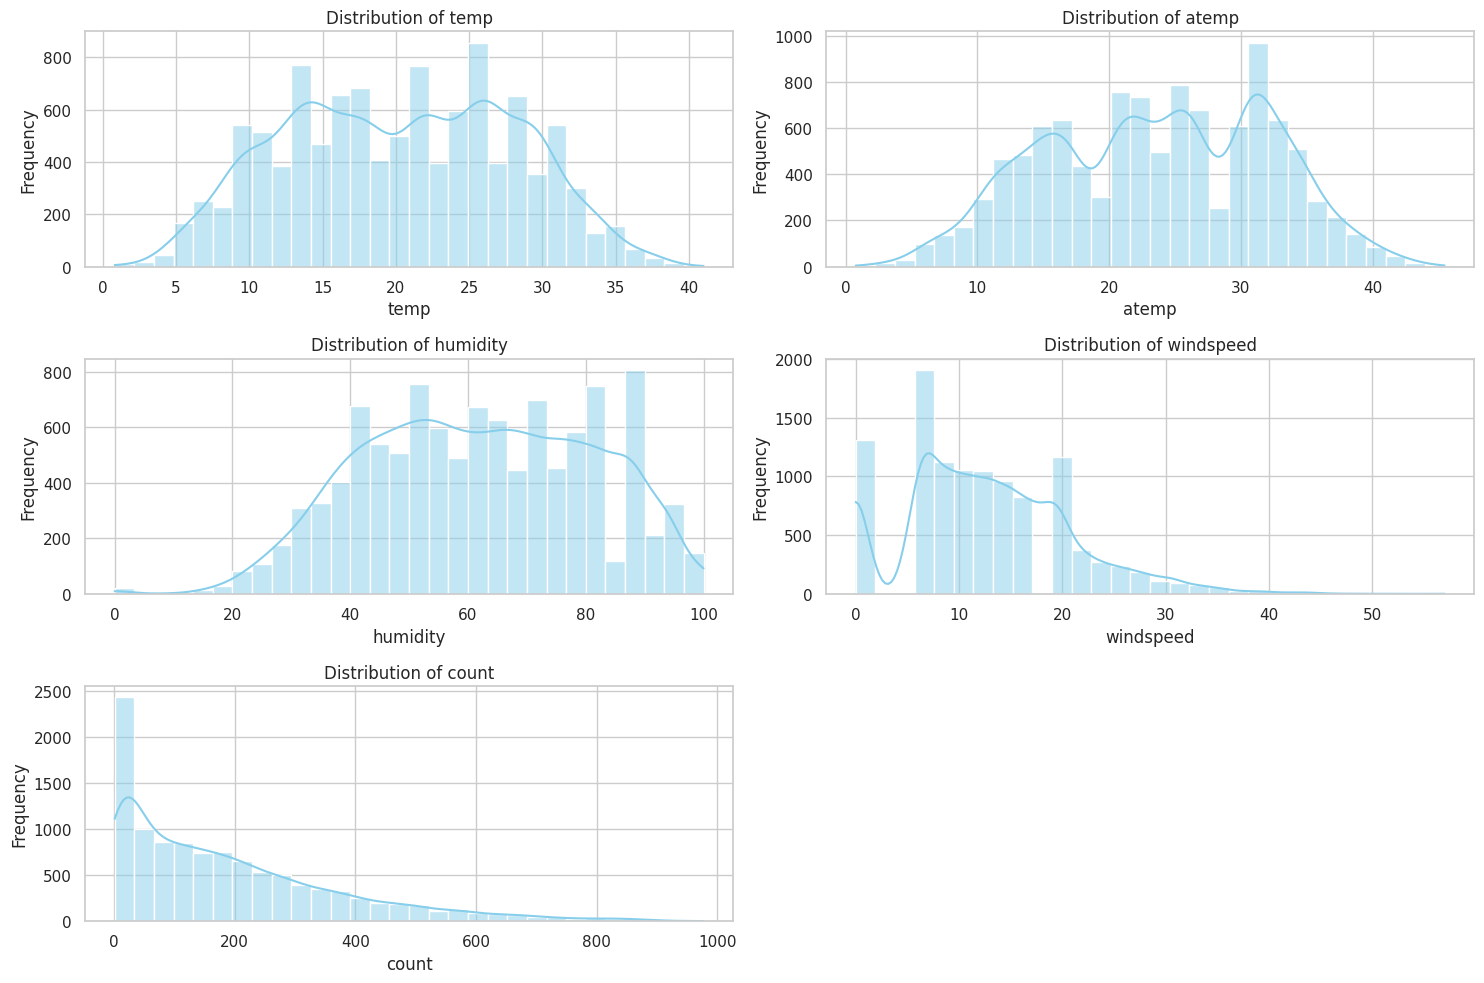

In [ ]:
# Univariate Analysis
sns.set(style='whitegrid')
numerical_columns= ['temp', 'atemp', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(15,10))

for i, col in enumerate(numerical_columns,1):
  plt.subplot(3,2,i)
  sns.histplot(data=df[col],kde=True,bins=30,color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observations based on the above graphs**

1. Temperature : Bimodal dit which peaks around 15 and 25 degree celsius.
2. The atemp also peaks around 15 and 30 degree celsuis sowing bimodal dit.
3. Humidity shows a peak around 60-70%.
4. The histogram indicates most occurrences are around 10 km/h, with a long tail extending to higher wind speeds.
5. The count dist is right-skwewed havinig a peak for 0-10, and declining as the count increases.

**Bivariate Analysis**

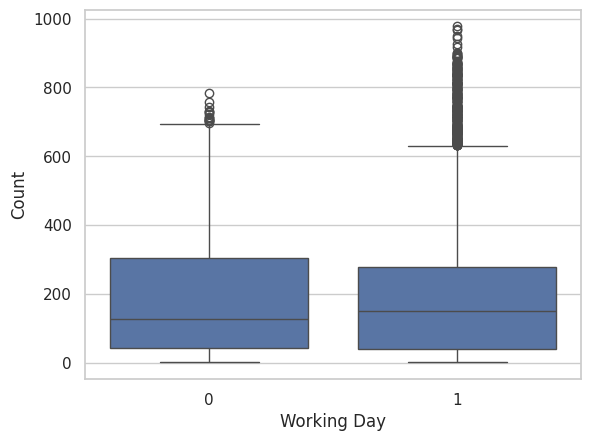

In [ ]:
# Bivariate Analysis
sns.set(style='whitegrid')
sns.boxplot(x='workingday',y='count',data=df)
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show('Count vs WorkingDay')
plt.show()

From the above graph we can tell that :

1.   The median no of cycles taken are higher on working days than no working days
2.   List item the variability is higher for working days and outliers too.



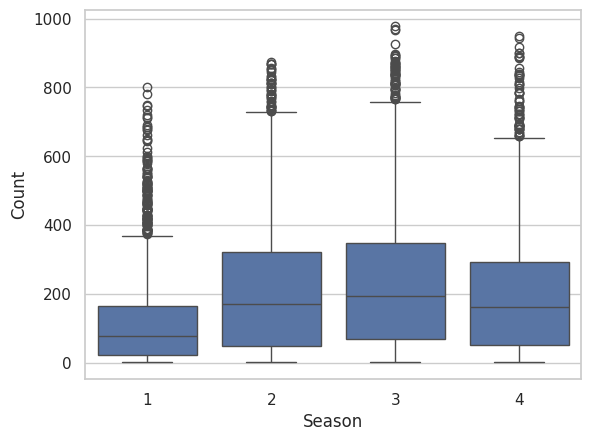

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x='season',y='count',data=df)
plt.xlabel('Season')
plt.ylabel('Count')
plt.show('Count vs Season')
plt.show()

The median number of cycles rented is lower in Season 1 compared to Seasons 2, 3, and 4.Variability is higher for 2,3,4 and outliers are high for all of them indincating higher rental counts.

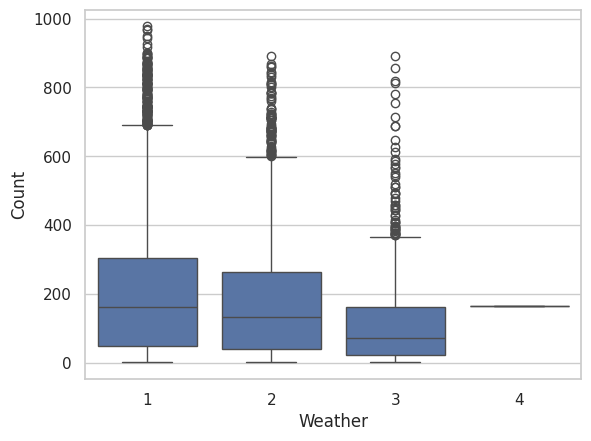

In [ ]:
sns.set(style='whitegrid')
sns.boxplot(x='weather',y='count',data=df)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show('Count vs Weather')
plt.show()

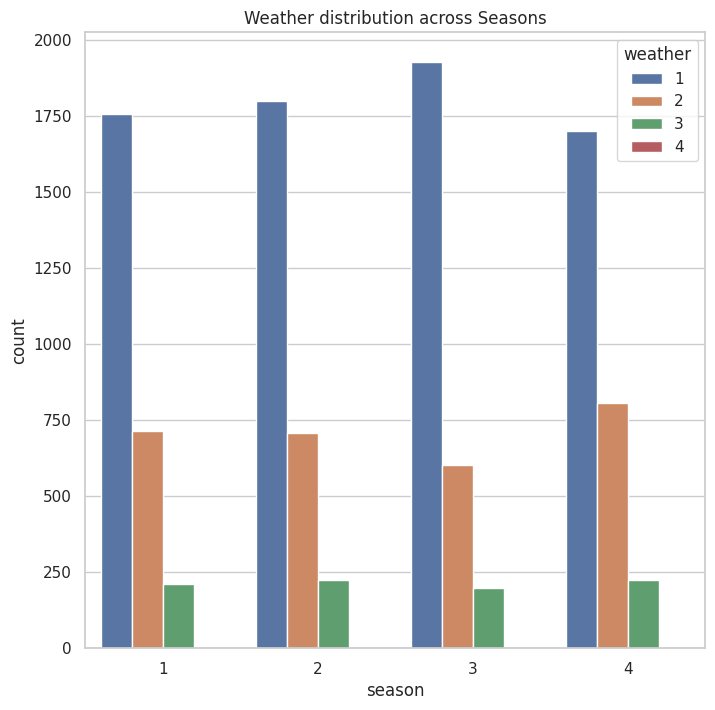

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='season',hue='weather',data=df)
plt.title('Weather distribution across Seasons')
plt.show()

Weather type 1 is predominant across all seasons.

Weather type 2 follows, with consistently high counts.

Weather types 3 and 4 have significantly lower occurrences.

**To check verify the assumptions of the test**

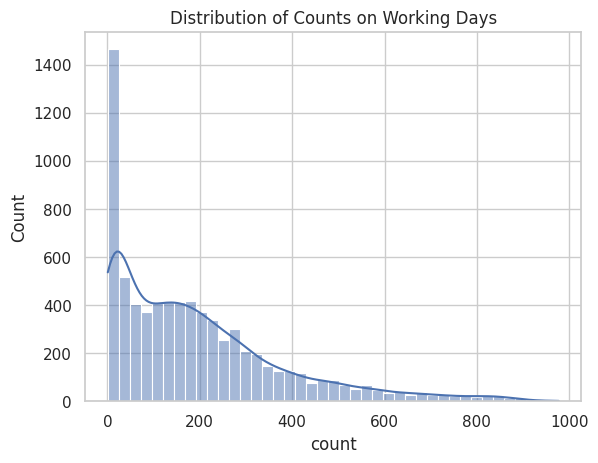

In [ ]:
# Histogram
working_day=df[df['workingday']==1]['count']
non_working_day=df[df['workingday']==0]['count']

sns.histplot(working_day, kde=True)
plt.title('Distribution of Counts on Working Days')
plt.show()

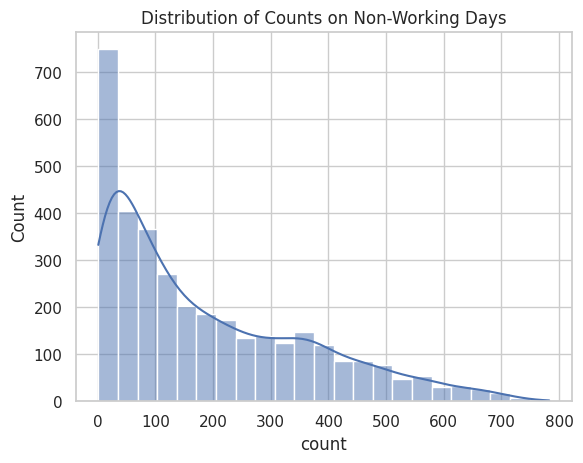

In [ ]:
sns.histplot(non_working_day, kde=True)
plt.title('Distribution of Counts on Non-Working Days')
plt.show()

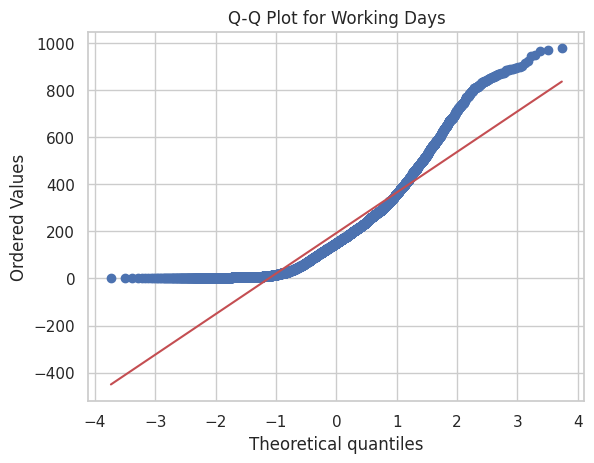

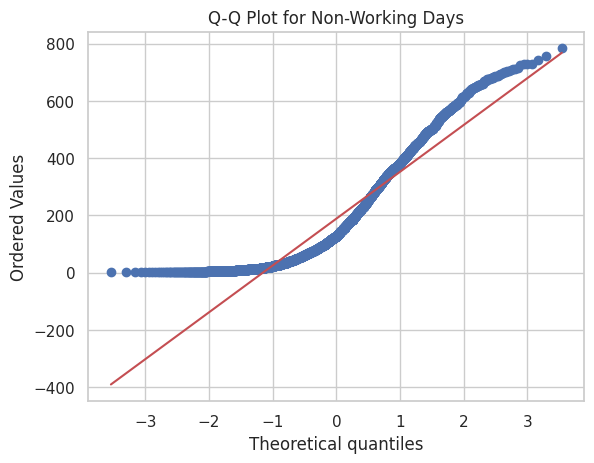

In [ ]:
sc.probplot(working_day, dist="norm", plot=plt)
plt.title('Q-Q Plot for Working Days')
plt.show()

sc.probplot(non_working_day, dist="norm", plot=plt)
plt.title('Q-Q Plot for Non-Working Days')
plt.show()

In [ ]:
# To Check Normality Shapiro-Wilks Test
shpiro_workingday=sc.shapiro(working_day)
shpiro_non_workingday=sc.shapiro(non_working_day)
print(f'Shapiro-Wilk Test for Working Days: {shpiro_workingday}')
print(f'Shapiro-Wilk Test for Working Days: {shpiro_non_workingday}')

Shapiro-Wilk Test for Working Days: ShapiroResult(statistic=0.8702545795617624, pvalue=2.2521124830019574e-61)
Shapiro-Wilk Test for Working Days: ShapiroResult(statistic=0.885211755076074, pvalue=4.4728547627911074e-45)


In [ ]:
# Leven's Test (To check Variance)
levene_test=sc.levene(working_day,non_working_day)
print(f'Leven\'s Test {levene_test}')

Leven's Test LeveneResult(statistic=0.004972848886504472, pvalue=0.9437823280916695)


**Working Day has an effect on the number of electric cycles rented.**

Null Hypothesis (H0): There is no difference in the number of cycles rented on working days and non-working days.

Alternate Hypothesis (H1): There is a difference in the number of cycles rented on working days and non-working days.

In [ ]:
working_day=df[df['workingday']==1]['count']
non_working_day=df[df['workingday']==0]['count']
t,p=sc.ttest_ind(working_day,non_working_day)
if p<0.5:
  print('Reject H0, There is a difference in the number of cycles rented on working days and non-working days.')
else:
  print('Reject H1')

Reject H0, There is a difference in the number of cycles rented on working days and non-working days.


**Number of Cycles Rented across Different Weather Conditions and Seasons**

Null Hypothesis (H0): The number of cycles rented is the same across different weather conditions and seasons.

Alternate Hypothesis (H1): The number of cycles rented is different across different weather conditions and seasons.

In [ ]:
# Storing the counts of the weather
weather_groups = [df[df['weather'] == i]['count'] for i in range(1, 5)]
# * used to spread the arrays
fw,pw = sc.f_oneway(*weather_groups)

season_groups = [df[df['season'] == i]['count'] for i in range(1, 5)]
# * used to spread the arrays
fs,ps = sc.f_oneway(*weather_groups)

if pw < 0.5 and ps< 0.5:
  print('Reject H0, The number of cycles rented is different across different weather conditions and seasons. ')
else:
  print('Reject H1')

Reject H0, The number of cycles rented is different across different weather conditions and seasons. 


**Dependency of Weather on Season**

Null Hypothesis (H0): Weather is independent of the season.

Alternate Hypothesis (H1): Weather is dependent on the season.

In [ ]:
# chi-square
contingency_table=pd.crosstab(df['season'],df['weather'])
contingency_table
result=sc.chi2_contingency(contingency_table)
result
if result.pvalue < 0.5:
  print('Reject H0, Weather is dependent on the season')
else:
  print('Reject H1')

Reject H0, Weather is dependent on the season
